# Setup and Method Definitions

In [22]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [23]:
def print_summary(df):
    print("Data dimensions:", df.shape)
    print("\n")
    print("Sample data:")
    print(df.head())
    print("\n")
    print("Data type of each column:")
    print(df.dtypes)
    print("\n")
    print("Summary statistics:")
    print(df.describe())
    print("\n")
    print("Number of unique values for each column")
    print(df.apply(lambda a : len(np.unique(a))))
    print("\n")
    print("Number of missing values for each column")
    print(df.apply(lambda a : np.sum(a.isna())))
    print("\n")
    print("Correlation matrix:")
    sns.heatmap(df.corr())

def numeric_scatter_matrix(df, omit_na=True):
    numeric_cols = []
    for i, j in zip(df.dtypes.index, df.dtypes):
        if j == float or j == int:
            numeric_cols.append(i)
    if len(numeric_cols) > 1:
        if omit_na:
            return px.scatter_matrix(df[numeric_cols].dropna())
        else:
            return px.scatter_matrix(df[numeric_cols])
    else:
        print("Not enough numeric columns for a scatter matrix")
        return None

# Cases EDA

Data dimensions: (21021, 5)


Sample data:
   FISC_YR_WK BRNCH_CD  DIV_NBR                     DIV_NM   CASES_SOLD
0      201711       2I     2160             METRO NEW YORK  499389.7707
1      201712       4V     3190  PHILADELPHIA - BRIDGEPORT  160460.6123
2      201712       8U     3210                      SALEM  190423.6692
3      201736       6U     3186                    JACKSON  161188.8908
4      201726       5G     2240                    RALEIGH  385007.2903


Data type of each column:
FISC_YR_WK      int64
BRNCH_CD       object
DIV_NBR         int64
DIV_NM         object
CASES_SOLD    float64
dtype: object


Summary statistics:
          FISC_YR_WK       DIV_NBR     CASES_SOLD
count   21021.000000  21021.000000   21021.000000
mean   201995.323771   3187.430284  189363.749996
std       173.665222   1747.568186  132583.466803
min    201704.000000    248.000000      -1.000000
25%    201836.000000   2170.000000   80300.333400
50%    202014.000000   3023.000000  171615.000000
7

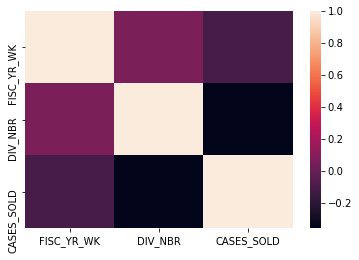

In [24]:
cases = pd.read_csv("./cases_sold.csv")
print_summary(cases)

In [25]:
temp = cases.copy()
px.histogram(temp, x='CASES_SOLD')

In [26]:
from sklearn.preprocessing import RobustScaler
temp['CASES_SOLD'] = RobustScaler(with_centering=False, with_scaling=True, quantile_range=(25,75)).fit_transform(temp[['CASES_SOLD', 'DIV_NBR']])[:,0]
px.histogram(temp, x='CASES_SOLD')

In [27]:
np.percentile(cases['CASES_SOLD'], [25, 75])

array([ 80300.3334, 260113.6679])

In [28]:
temp['CASES_SOLD']

0        2.777268
1        0.892373
2        1.059007
3        0.896423
4        2.141150
           ...   
21016    0.011140
21017    0.017941
21018    0.019451
21019    0.057340
21020    0.000078
Name: CASES_SOLD, Length: 21021, dtype: float64

In [29]:
cases['year'] = cases['FISC_YR_WK']//100
biggest_sellers = cases.groupby('BRNCH_CD')['CASES_SOLD'].aggregate(np.mean).sort_values(ascending=False)
branches = biggest_sellers.index[:10]
cases_agg = pd.DataFrame(cases.groupby(['BRNCH_CD', 'year'])['CASES_SOLD'].aggregate(np.mean)).reset_index()
px.line(cases_agg[cases_agg['BRNCH_CD'].isin(np.array(branches))], x='year', y='CASES_SOLD', color='BRNCH_CD', 
        title='Average cases sold per year for top 10 branches')

In [30]:
cases['year'] = cases['FISC_YR_WK']//100
biggest_sellers = cases.groupby('BRNCH_CD')['CASES_SOLD'].aggregate(np.mean).sort_values(ascending=False)
branches = biggest_sellers.index[-10:]
cases_agg = pd.DataFrame(cases.groupby(['BRNCH_CD', 'year'])['CASES_SOLD'].aggregate(np.mean)).reset_index()
px.line(cases_agg[cases_agg['BRNCH_CD'].isin(np.array(branches))], x='year', y='CASES_SOLD', color='BRNCH_CD', 
        title='Average cases sold per year for bottom 10 branches')

In [31]:
px.box(cases, x='year', y='CASES_SOLD')

# Inventory EDA

Data dimensions: (27610, 5)


Sample data:
   FISC_YR_WK BRNCH_CD TEMP_ZONE  MAX_WKLY_INVENTORY  \
0      202108       9D       FRZ       511360.166667   
1      202117       5D       DRY       678475.825007   
2      202107       8D       FRZ        15504.000000   
3      202116       4R       DRY       129619.800832   
4      202115       3Y       FRZ       265284.458333   

                          LDR_TM  
0  2023-01-27T14:23:26.861-08:00  
1  2023-01-27T14:23:26.861-08:00  
2  2023-01-27T14:23:26.861-08:00  
3  2023-01-27T14:23:26.861-08:00  
4  2023-01-27T14:23:26.861-08:00  


Data type of each column:
FISC_YR_WK              int64
BRNCH_CD               string
TEMP_ZONE              string
MAX_WKLY_INVENTORY    float64
LDR_TM                 object
dtype: object


Summary statistics:
          FISC_YR_WK  MAX_WKLY_INVENTORY
count   27610.000000        2.761000e+04
mean   202184.181746        1.730265e+05
std        54.448991        1.753729e+05
min    202104.000000        0.00

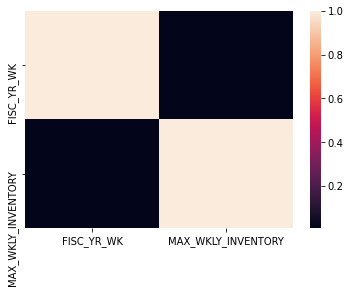

In [32]:
inv = pd.read_csv("./inventory.csv")
inv['BRNCH_CD'] = inv['BRNCH_CD'].astype('string')
inv['TEMP_ZONE'] = inv['TEMP_ZONE'].astype('string')
# Note that this means they won't show up as NA values anymore but otherwise the summary doesnt run
inv['TEMP_ZONE'] = inv['TEMP_ZONE'].fillna('NA') 
print_summary(inv)

In [33]:
sum(inv['TEMP_ZONE'] == "NA")

2200

In [34]:
np.mean(inv['MAX_WKLY_INVENTORY'])

173026.487338765

In [35]:
mean_std = inv.groupby('BRNCH_CD')['MAX_WKLY_INVENTORY'].agg(['mean', 'std']).reset_index()
mean_std

BRNCH_CD           mean            std
0        2C       0.000000       0.000000
1        2G  181619.303455   81421.555273
2        2H   25496.625557   49949.088412
3        2I  392083.174966  330231.329226
4        2J  277577.336272  128561.501597
..      ...            ...            ...
88       X5       0.000000       0.000000
89       X6    9998.278846    2812.545889
90       X7     147.423077     620.111338
91       X8     664.326923      64.522208
92       X9       0.000000       0.000000

[93 rows x 3 columns]

In [36]:
px.histogram(mean_std, x='mean', nbins=20, title='Histogram of mean maximum weekly inventory within each branch')

In [37]:
px.histogram(mean_std, x='std', nbins=15, title='Histogram of standard deviation of maximum weekly inventory within each branch')

In [38]:
inv['Year'] = inv['FISC_YR_WK']//100
# Rename values of temp_zone to match terms used in AREA of slot utilization table for merging later
inv['TEMP_ZONE'] = inv['TEMP_ZONE'].replace(['CLR', 'DRY', 'FRZ'], ['Refrigerated', 'Dry', 'Freezer'])

#px.box(inv, "Year", "MAX_WKLY_INVENTORY")
px.box(inv[inv['TEMP_ZONE'] != 'NA'], "TEMP_ZONE", "MAX_WKLY_INVENTORY")

# Spoilage EDA

Data dimensions: (19068, 5)


Sample data:
   FISC_YR_WK BRNCH_CD TEMP_ZONE  CASES_IMPACTED  SPOILAGE
0      202315       6U       FRZ           37.00      37.0
1      202315       2I       DRY           58.00      58.0
2      202315       8S       FRZ           18.00      18.0
3      202314       2R       DRY            3.00       3.0
4      202314       3Z       CLR          193.25     194.5


Data type of each column:
FISC_YR_WK          int64
BRNCH_CD           object
TEMP_ZONE          object
CASES_IMPACTED    float64
SPOILAGE          float64
dtype: object


Summary statistics:
          FISC_YR_WK  CASES_IMPACTED      SPOILAGE
count   19068.000000    19068.000000  19068.000000
mean   202282.294735      155.803582    156.346106
std        56.625109      260.879564    261.228046
min    202201.000000        0.000000      0.000000
25%    202228.000000       17.000000     17.000000
50%    202304.000000       70.000000     70.000000
75%    202330.000000      202.000000    203.250000
m

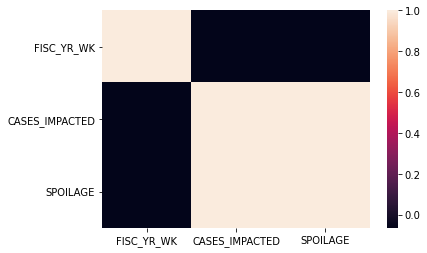

In [39]:
spoilage = pd.read_csv("./spoilage.csv")
print_summary(spoilage)

In [40]:
# Rename values of temp_zone to match terms used in AREA of slot utilization table for merging later
spoilage['TEMP_ZONE'] = spoilage['TEMP_ZONE'].replace(['CLR', 'DRY', 'FRZ'], ['Refrigerated', 'Dry', 'Freezer'])

In [41]:
#numeric_scatter_matrix(spoilage)

In [42]:
# Turning fiscal year and week into useful date for plotting
import datetime
spoilage['year'] = spoilage['FISC_YR_WK']//100
spoilage['week'] = spoilage['FISC_YR_WK']%100
def combine(year, week):
    return str(year) + str(week) + "0"
spoilage['FISC_DATE'] = spoilage.apply(lambda a : combine(a['year'], a['week']), axis=1)
spoilage['FISC_DATE'].apply(lambda a : datetime.datetime.strptime(a, "%Y%W%w").date())

0        2023-04-16
1        2023-04-16
2        2023-04-16
3        2023-04-09
4        2023-04-09
            ...    
19063    2022-06-19
19064    2022-06-19
19065    2022-06-19
19066    2022-06-19
19067    2022-06-12
Name: FISC_DATE, Length: 19068, dtype: object

In [43]:
spoilage_agg = pd.DataFrame(spoilage.groupby(['TEMP_ZONE', 'FISC_DATE'])['SPOILAGE'].aggregate(np.mean)).reset_index()
px.line(spoilage_agg, x='FISC_DATE', y='SPOILAGE', color='TEMP_ZONE', 
        title='Average spoilage by temp zone')

# Slot Utilization EDA

In [3]:
slot_util = pd.read_csv("./Slot Utilization.csv")
slot_util['DATE_EXTRACT'] = pd.to_datetime(slot_util['DATE_EXTRACT'])
slot_util['SUM(PALLET_USED)'] = slot_util['SUM(PALLET_USED)'].fillna(0)
print_summary(slot_util)

NameError: name 'print_summary' is not defined

   WAREHOUSE_LOCN          AREA BRNCH_CD            FULL_MARKET_NAME  \
0            2125       Freezer       5O         MANASSAS (5O, 2125)   
1            3148       Freezer       4H   SALT LAKE CITY (4H, 4118)   
2            2345  Refrigerated       3J         BISMARCK (3J, 2345)   
3            4135       Freezer       8T  PHOENIX SYSTEMS (8T, 4135)   
4            1106           Dry       8L          DETROIT (8L, 1106)   

       STORAGE_TYPE PICK_TYPE DATE_EXTRACT  SUM(PALLET_USED)  \
0    Main Warehouse   Reserve   2022-05-16            9358.0   
1  Off-Site Storage   Reserve   2022-05-03               0.0   
2    Main Warehouse   Reserve   2021-10-19             477.0   
3    Main Warehouse   Reserve   2021-10-08            1330.0   
4    Main Warehouse      Pick   2021-05-12            5585.0   

   SUM(PALLET_POSITIONS)  CAPACITY  
0                  13044  0.717417  
1                      0       NaN  
2                    905  0.527071  
3                   1694  0.785123

<AxesSubplot:>

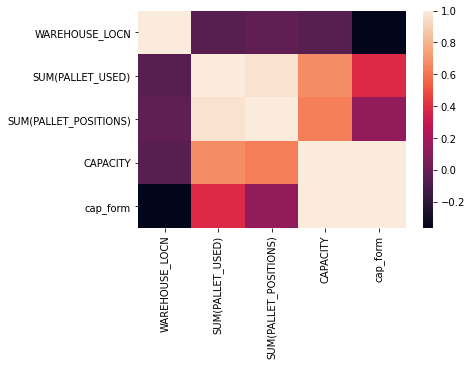

In [16]:
# Confirming that capacity is just SUM(PALLET_USED) / SUM(PALLET_POSITIONS)

cap_form = slot_util['SUM(PALLET_USED)'] / slot_util['SUM(PALLET_POSITIONS)'] 
print(slot_util.head())
slot_util['cap_form'] = cap_form
sns.heatmap(slot_util.corr())
slot_util.drop('cap_form', inplace=True)

In [12]:
subset = slot_util[slot_util['BRNCH_CD'] == '9Q']
subset = subset.groupby(['DATE_EXTRACT', 'BRNCH_CD', 'FULL_MARKET_NAME']).agg(np.mean).reset_index()
px.line(subset, x='DATE_EXTRACT', y='CAPACITY', title='Capacity over time for Spokane Branch')

In [17]:
mini = slot_util.sample(10000).sort_values(by='DATE_EXTRACT')
px.scatter(mini.dropna(), 'DATE_EXTRACT', 'CAPACITY', color='AREA', trendline='lowess')

In [18]:
mini = slot_util.sample(10000).sort_values(by='DATE_EXTRACT')
px.scatter(mini.dropna(), 'DATE_EXTRACT', 'CAPACITY', color='STORAGE_TYPE', trendline='lowess')

In [19]:
px.box(mini.dropna(), 'BRNCH_CD', 'CAPACITY')

In [22]:
#px.histogram(mini, 'SUM(PALLET_USED)', histnorm='density')
px.histogram(mini, 'SUM(PALLET_POSITIONS)', histnorm='density')

# Combined EDA

In [23]:
### Date ranges for each table
print(min(inv['FISC_YR_WK']), max(inv['FISC_YR_WK']))
print(min(cases['FISC_YR_WK']), max(cases['FISC_YR_WK']))
print(min(spoilage['FISC_YR_WK']), max(spoilage['FISC_YR_WK']))
print(min(slot_util['DATE_EXTRACT']), max(slot_util['DATE_EXTRACT']))

202104 202303
201704 202303
202201 202404
2021-02-14 00:00:00 2023-01-29 00:00:00


In [25]:
### Summary of each individual table's meaning

# Cases - one row represents the number of cases sold per week at each branch
# Note that BRNCH_CD, DIV_NBR, and DIV_NM all seem to refer to the same thing
# print(cases.head())
# print("\n")

# Inventory - one row represents the max inventory per section (temp_zone) per branch each week
# print(inv.head())
# print("\n")

# Spoilage - one row represents the amount of spoilage/waste in each zone of each branch every week
# print(spoilage.head())
# print("\n")

# Slot Utilization - one row represents the amount of space used within each area of each storage type of each warehouse every day
# print(slot_util.head())

In [26]:
#slot_util[(slot_util['AREA'] == 'Freezer') & (slot_util['BRNCH_CD'] == '5O') & (slot_util['STORAGE_TYPE'] == 'Main Warehouse') & (slot_util['PICK_TYPE'] == 'Pick')].sort_values(by='DATE_EXTRACT')

In [27]:
### Merging data
# Add fiscal week and quarter columns to slot utilization to join on
fw = slot_util['DATE_EXTRACT'].apply(lambda a : int(str(a.year) + str(a.week)))
slot_util['FISC_YR_WK'] = fw
fq = slot_util['DATE_EXTRACT'].apply(lambda a : str(a.year) + "Q" + str(a.quarter))
slot_util['fisc_yr_qtr'] = fq
print(slot_util.head())
print(slot_util.shape)
print("\n")

# Merge slot_util with cases data
merged = slot_util.merge(cases, how='left', on=['BRNCH_CD', 'FISC_YR_WK'], validate="m:1")
merged['DIV_NBR'] = merged['DIV_NBR'].fillna(0)
print(merged.head())
print(merged.shape)
print("\n")

# Merge with market data (not using anymore)
# merged = merged.merge(market, how='left', left_on=['DIV_NBR', 'fisc_yr_qtr'], 
#                       right_on=['div_nbr', 'fisc_yr_qtr'], validate="m:m")
# print(merged.head())
# print(merged.shape)
# print("\n")

# Merge with spoilage data
merged = merged.merge(spoilage, how='left', left_on=['BRNCH_CD', 'FISC_YR_WK', 'AREA'], 
                      right_on=['BRNCH_CD', 'FISC_YR_WK', 'TEMP_ZONE'], validate="m:1")
print(merged.head())
print(merged.shape)
print("\n")

# Merge with inventory data
merged = merged.merge(inv, how='left', left_on=['BRNCH_CD', 'FISC_YR_WK', 'AREA'], 
                      right_on=['BRNCH_CD', 'FISC_YR_WK', 'TEMP_ZONE'], validate="m:1")
print(merged.head())
print(merged.shape)
print("\n")

   WAREHOUSE_LOCN          AREA BRNCH_CD            FULL_MARKET_NAME  \
0            2125       Freezer       5O         MANASSAS (5O, 2125)   
1            3148       Freezer       4H   SALT LAKE CITY (4H, 4118)   
2            2345  Refrigerated       3J         BISMARCK (3J, 2345)   
3            4135       Freezer       8T  PHOENIX SYSTEMS (8T, 4135)   
4            1106           Dry       8L          DETROIT (8L, 1106)   

       STORAGE_TYPE PICK_TYPE DATE_EXTRACT  SUM(PALLET_USED)  \
0    Main Warehouse   Reserve   2022-05-16            9358.0   
1  Off-Site Storage   Reserve   2022-05-03               0.0   
2    Main Warehouse   Reserve   2021-10-19             477.0   
3    Main Warehouse   Reserve   2021-10-08            1330.0   
4    Main Warehouse      Pick   2021-05-12            5585.0   

   SUM(PALLET_POSITIONS)  CAPACITY  cap_form  FISC_YR_WK fisc_yr_qtr  
0                  13044  0.717417  0.717418      202220      2022Q2  
1                      0       NaN      

In [28]:
# Remove extra columns from merging
merged = merged.drop(["TEMP_ZONE_x", "TEMP_ZONE_y", "LDR_TM", "Year", "SUM(PALLET_USED)", "SUM(PALLET_POSITIONS)"], axis=1)
# merged.to_csv('./merged.csv')

<AxesSubplot:>

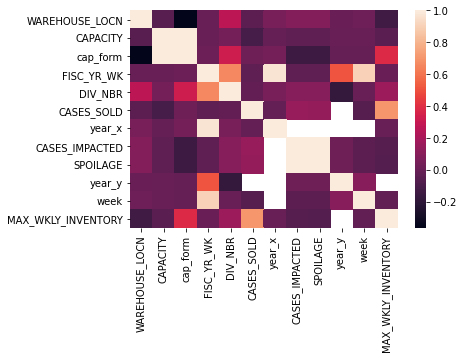

In [29]:
sns.heatmap(merged.corr())

In [30]:
numeric_scatter_matrix(merged.sample(1000))

In [31]:
from statsmodels.graphics.mosaicplot import mosaic
ct = pd.crosstab(merged['PICK_TYPE'], merged['STORAGE_TYPE'])
ct

STORAGE_TYPE    9999  Inactive  Main Warehouse  Off-Site Storage  Trailer  \
PICK_TYPE                                                                   
Pick            5041    160762          156049             26238     2365   
Reserve       163164    144957          160107            134124    13346   

STORAGE_TYPE  Virtual Slot  
PICK_TYPE                   
Pick                116340  
Reserve              55999

In [32]:
px.scatter(merged.sample(10000), "SPOILAGE", "CAPACITY", trendline='lowess')